# Weather Bench notebook - 01

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import dask.array as da
import glob

## Explore weatherbench netCDF

In [87]:
#ls /g/data/wb00/admin/testing/weatherbench/5.625deg/u_component_of_wind

### Single 

In [5]:
m_dir = '/g/data/wb00/admin/testing/weatherbench/5.625deg'
file = m_dir + '/10m_u_component_of_wind/10m_u_component_of_wind_1979_5.625deg.nc'
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 8760)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    u10      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-01 15:32:48 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

In [ ]:
ds.dims

In [ ]:
ds.data_vars

In [ ]:
ds.coords

In [35]:
#ds.attrs

In [ ]:
ds.u10 

In [37]:
ds.u10.shape

(8760, 32, 64)

### Pressure

In [ ]:
file = m_dir + '/geopotential/geopotential_1979_5.625deg.nc'
ds = xr.open_dataset(file)
ds 

In [90]:
#for i in range (0,76):
#    print(ds.time.values[i])
ds.level.values    

array([  50,  100,  150,  200,  250,  300,  400,  500,  600,  700,  850,
        925, 1000], dtype=int32)

# rt52

In [ ]:
#nci_dir = '/g/data/rt52/era5/single-levels/monthly-averaged-by-hour/10u/1979'
#file = nci_dir + '/10u_era5_mnth_sfc_19790101-19790131.nc'
#nci_dir = '/g/data/rt52/era5/pressure-levels/monthly-averaged-by-hour/cc/1959'  
#file = nci_dir + '/cc_era5_mnth_pl_19591201-19591231.nc'
nci_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/cc/1959'
file = nci_dir + '/cc_era5_oper_pl_19590101-19590131.nc'  
#file = nci_dir + '/cc_era5_oper_pl_19590201-19590228.nc'
ds = xr.open_dataset(file)
ds

In [ ]:
ds.dims

In [ ]:
ds.coords

In [81]:
#ds.level[0].cc[2].plot()

In [15]:
#nci_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/t/1959/*'
nci_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/t/1959/t_era5_oper_pl_19590101-19590131.nc'
data = xr.open_mfdataset(nci_dir, chunks={"time": 100})
# '1959-01-01T23:00:00.000000000'
#'1959-01-01T01:00:00.000000000'
data = data.sel(time=slice('1959-01-01T01:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 37, time: 2)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1959-01-01 1959-01-01T01:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(2, 37, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-09 19:43:28 UTC+1000 by era5_replication_tools-1.11...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper temperature 19590101-19590131

In [16]:
data.chunks

Frozen({'time': (2,), 'level': (37,), 'latitude': (721,), 'longitude': (1440,)})

In [12]:
data['t'][0][0]

<xarray.DataArray 't' (latitude: 721, longitude: 1440)>
dask.array<getitem, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 1
    time       datetime64[ns] 1959-01-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [ ]:
data.level.values   

In [30]:
#data2 = data.sel(level=[ 50,  100,  150,  200,  250,  300,  400,  500,  600,  700,  850, 925, 1000])
data2 = data.sel(level=[ 50 ] )
data2

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 1, time: 2)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 50
  * time       (time) datetime64[ns] 1959-01-01 1959-01-01T01:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(2, 1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-09 19:43:28 UTC+1000 by era5_replication_tools-1.11...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper temperature 19590101-19590131

In [31]:
#ds_in = data2[["longitude", "level", "latitude", "time"]]
ds_in = data2[["t", "time", "level", "latitude", "longitude" ]]
ds_in

<xarray.Dataset>
Dimensions:    (time: 2, level: 1, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 1959-01-01 1959-01-01T01:00:00
  * level      (level) int32 50
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(2, 1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-09 19:43:28 UTC+1000 by era5_replication_tools-1.11...
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper temperature 19590101-19590131

In [32]:
#ds_in = ds_in["level"]
ds_in.chunks

Frozen({'time': (2,), 'level': (1,), 'latitude': (721,), 'longitude': (1440,)})

In [33]:
if 'latitude' in ds_in.coords:
        ds_in = ds_in.rename({'latitude': 'lat', 'longitude': 'lon'})  

In [61]:
ddeg_out = 2.8125 #  1.40625 # 5.625
grid_out = xr.Dataset(
    {
        'lat': (['lat'], np.arange(-90+ddeg_out/2, 90, ddeg_out)),
        'lon': (['lon'], np.arange(0, 360, ddeg_out)),
    })

In [82]:
regridder = xe.Regridder(
        ds_in, grid_out, method='bilinear', periodic=True ) # ,  reuse_weights=True )

fn = regridder.to_netcdf("/scratch/fp0/mah900/WeatherBench/bilinear_1.nc")

In [79]:
regridder2 = xe.Regridder(
        ds_in, grid_out, method='bilinear', periodic=True, weights=fn)

In [83]:
ds_out = regridder2(ds_in['t'] )
ds_out 

<xarray.DataArray (time: 2, level: 1, lat: 64, lon: 128)>
dask.array<_regrid, shape=(2, 1, 64, 128), dtype=float32, chunksize=(2, 1, 64, 128), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-01-01T01:00:00
  * level    (level) int32 50
  * lat      (lat) float64 -88.59 -85.78 -82.97 -80.16 ... 82.97 85.78 88.59
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  bilinear

In [84]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    result = ds_out.compute()

[########################################] | 100% Completed | 205.69 s
CPU times: user 1min 6s, sys: 2min 16s, total: 3min 22s
Wall time: 3min 25s


In [37]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    result = ds_out['t'].compute()

[########################################] | 100% Completed | 353.44 s
CPU times: user 1min 11s, sys: 2min 21s, total: 3min 32s
Wall time: 5min 53s


In [58]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    result = ds_out['t'].compute(schedular='processes')

[########################################] | 100% Completed | 206.55 s
CPU times: user 1min 4s, sys: 2min 14s, total: 3min 18s
Wall time: 3min 26s


In [64]:
%%time
from dask.diagnostics import ProgressBar
with ProgressBar():
    result = ds_out['t'].compute(schedular='processes')

[########################################] | 100% Completed | 209.01 s
CPU times: user 1min 4s, sys: 2min 16s, total: 3min 21s
Wall time: 3min 29s


### Function

In [10]:
import xesmf as xe
def regrid(ds_in,ddeg_out ):
    ddeg_out=5.625
    
    if 'latitude' in ds_in.coords:
        ds_in = ds_in.rename({'latitude': 'lat', 'longitude': 'lon'})    
    
    grid_out = xr.Dataset(
    {
        'lat': (['lat'], np.arange(-90+ddeg_out/2, 90, ddeg_out)),
        'lon': (['lon'], np.arange(0, 360, ddeg_out)),
    })
    
    regridder = xe.Regridder(
        ds_in, grid_out, method='bilinear', periodic=True) #,  reuse_weights=1 )

    
    ds_list = []
    chunk_size = 500
    n_chunks = len(ds_in.time) // chunk_size + 1
    for i in range(n_chunks):
        ds_small = ds_in.isel(time=slice(i*chunk_size, (i+1)*chunk_size))
        ds_list.append(regridder(ds_small).astype('float32')  )
        break
    ds_out = xr.concat(ds_list, dim='time')

    # Set attributes since they get lost during regridding
    for var in ds_out:
        ds_out[var].attrs =  ds_in[var].attrs
    ds_out.attrs.update(ds_in.attrs)

    return ds_out


In [ ]:
ddeg_out = 5.625
ds_out = regrid(ds_in,ddeg_out )
ds_out.to_netcdf("/scratch/fp0/mah900/WeatherBench/nci_5.625/saved_on_disk.nc")

In [31]:
ds_out

<xarray.Dataset>
Dimensions:  (time: 8760, level: 13, lat: 32, lon: 64)
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 ... 1959-12-31T23:00:00
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    t        (time, level, lat, lon) float32 dask.array<chunksize=(500, 13, 32, 64), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear
    Conventions:    CF-1.6
    history:        2022-09-09 19:43:28 UTC+1000 by era5_replication_tools-1....
    license:        Licence to use Copernicus Products: https://apps.ecmwf.in...
    summary:        ERA5 is the fifth generation ECMWF atmospheric reanalysis...
    title:          ERA5 pressure-levels oper temperature 19590101-19590131

In [ ]:
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
#ds_out['t'][0][0].plot.pcolormesh(ax=ax, x="lon", y="lat")
plt.imshow(ds_out['t'][0][0])
#ax.coastlines()

In [ ]:
ds_out['t'][0][0].values

## Ground Truth - 0.25 deg.

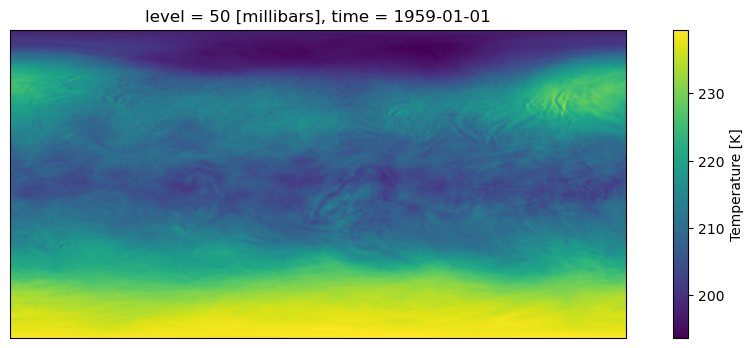

In [50]:
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
data['t'][0][8].plot.pcolormesh(ax=ax, x="longitude", y="latitude")

## 5.625 deg.

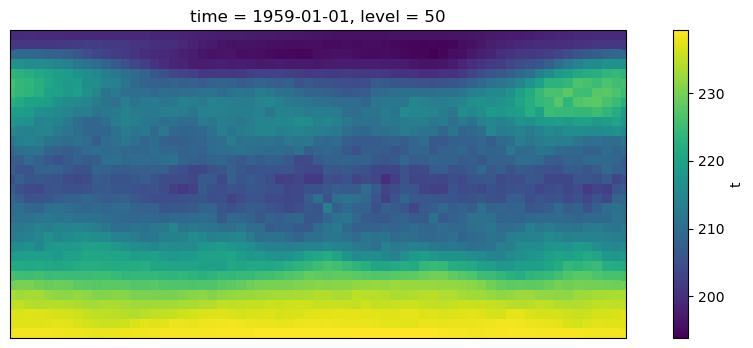

In [ ]:
result[0][0]
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True, which='both')
result[0][0].plot.pcolormesh(ax=ax, x="lon", y="lat")

## 2.8125 deg.

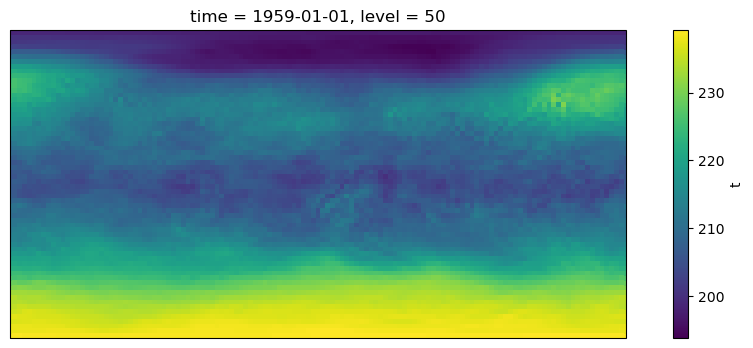

In [65]:
result[0][0]
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True, which='both')
result[0][0].plot.pcolormesh(ax=ax, x="lon", y="lat")

## 1.40625 deg.

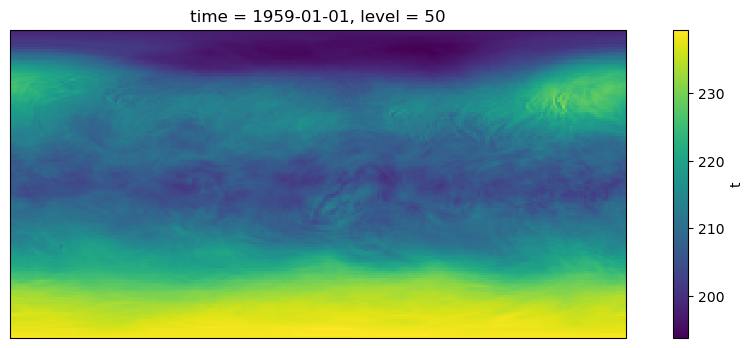

In [59]:
result[0][0]
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True, which='both')
result[0][0].plot.pcolormesh(ax=ax, x="lon", y="lat")

### RASM

In [ ]:
rasm = '/scratch/fp0/mah900/WeatherBench/rasm.nc'
ds = xr.open_dataset(
    rasm
)  # use xr.tutorial.load_dataset() for xarray<v0.11.0
 
dr = ds["Tair"]

plt.figure(figsize=(10, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
dr[0].plot.pcolormesh(ax=ax, x="xc", y="yc")
#ax.coastlines()
#ds = ds.rename({"xc": "lon", "yc": "lat"})
#ds_out = xe.util.grid_global(5, 4)
#regridder = xe.Regridder(ds, ds_out, "bilinear")
#dr_out = regridder(dr)
#dr_out

In [ ]:
dr[0]

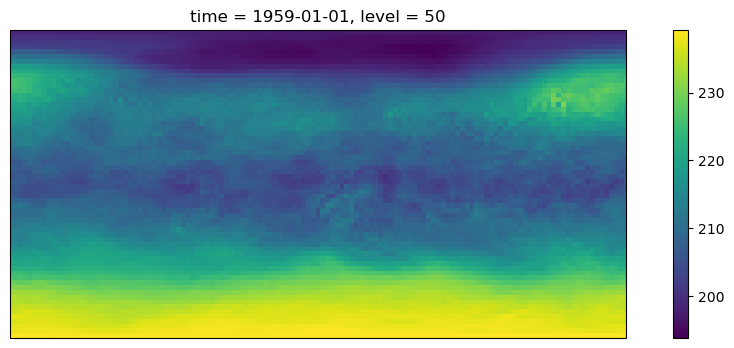

In [75]:
result[0][0]
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True, which='both')
result[0][0].plot.pcolormesh(ax=ax, x="lon", y="lat")

# Test

In [ ]:
file = '/g/data/wb00/admin/testing/weatherbench/nci_5.625/test.nc'
test = xr.open_dataset(file, chunks={"time": 100})
test

<xarray.Dataset>
Dimensions:  (time: 8760, level: 13, lat: 32, lon: 64)
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    t        (time, level, lat, lon) float32 dask.array<chunksize=(100, 13, 32, 64), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [ ]:
test["t"]

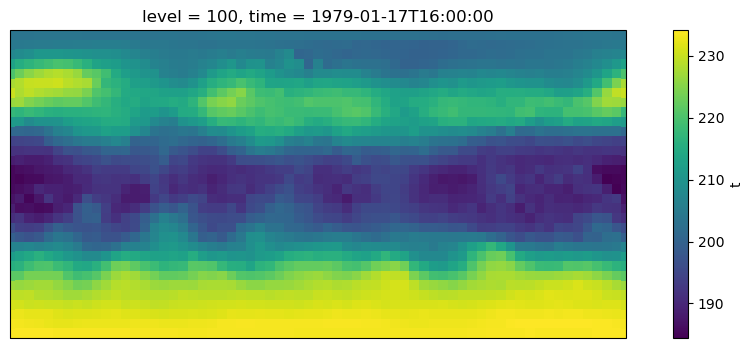

In [ ]:
 
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True, which='both')
test["t"][600][1].plot.pcolormesh(ax=ax, x="lon", y="lat")

In [13]:
#file = '/g/data/wb00/admin/testing/weatherbench/5.625deg/temperature/temperature_1979_5.625deg.nc'
file = '/g/data/wb00/admin/testing/nci_5.625/temperature/temperature_1979_5.625deg.nc'
test = xr.open_dataset(file, chunks={"time": 100})
test

<xarray.Dataset>
Dimensions:  (time: 8760, level: 13, lat: 32, lon: 64)
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    t        (time, level, lat, lon) float32 dask.array<chunksize=(100, 13, 32, 64), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

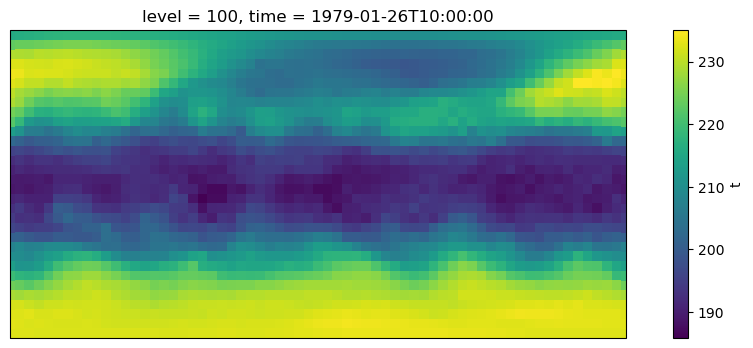

In [14]:
 
plt.figure(figsize=(12, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True, which='both')
test["t"][610][1].plot.pcolormesh(ax=ax, x="lon", y="lat")

## Test 2

In [9]:
file = '/g/data/wb00/admin/testing/weatherbench/5.625deg/temperature/temperature_1979_5.625deg.nc'
test = xr.open_dataset(file, chunks={"time": 100})
test

<xarray.Dataset>
Dimensions:  (time: 288, level: 13, lat: 32, lon: 64)
Coordinates:
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-01T23:00:00
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    t        (time, level, lat, lon) float32 dask.array<chunksize=(100, 13, 32, 64), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [7]:
in_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/t/1979/*'
data = xr.open_mfdataset(in_dir, chunks = {"time": 10} )

In [5]:
data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 37, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(10, 37, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    license:      Licence to use Copernicus Products: https://apps.ecmwf.int/...
    summary:      ERA5 is the fifth generation ECMWF atmospheric reanalysis o...
    title:        ERA5 pressure-levels oper temperature 19790101-19790131
    history:      2021-01-08 07:36:24 UTC+1100 by era5_replication_tools-1.8....

In [ ]:
! ls /g/data/rt52/era5/pressure-levels/reanalysis/t/1979/*

## Test 3

In [ ]:
! ls /g/data/rt52/era5/pressure-levels/monthly-averaged-by-hour/t/1979/*

In [ ]:
#nci_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/t/1959/*'
#nci_dir = '/g/data/rt52/era5/pressure-levels/monthly-averaged-by-hour/t/1979/*'
nci_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/t/1979/*'
data = xr.open_mfdataset(nci_dir, chunks={"time": 100})
data

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import dask.array as da
import sys
import os
import glob
import time
import socket
import platform
import yaml
from dask.diagnostics import ProgressBar
import datetime
from dask.distributed import Client, progress


def regrid_func_constant (in_file, out_file, ddeg_out, algorithm ):
	
	data = xr.open_dataset(in_file, chunks = {"time":1})
	ds_in = data.isel(time=0) 

	if 'latitude' in ds_in.coords:
        	ds_in = ds_in.rename({'latitude': 'lat', 'longitude': 'lon'})  

	grid_out = xr.Dataset(
	{
		'lat': (['lat'], np.arange(-90+ddeg_out/2, 90, ddeg_out)),
		'lon': (['lon'], np.arange(0, 360, ddeg_out)),
	})
	regridder = xe.Regridder(ds_in, grid_out, algorithm, periodic=True )  
	ds_out = regridder(ds_in)
	ds_out.to_netcdf(out_file, compute=True)


In [ ]:
start = datetime.datetime.now()
algorithm = "bilinear"
ddeg_out = 5.625 
out_dir = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg/constants/"
if not os.path.exists(out_dir):
	os.mkdir (out_dir)

orography_in  = "/g/data/rt52/era5/single-levels/reanalysis/z/1979/z_era5_oper_sfc_19790101-19790131.nc"
orography_out = os.path.join(out_dir, "orography")

regrid_func_constant (orography_in , orography_out, ddeg_out, algorithm )


land_sea_mask  = ""
soil_type      = ""

 
end = datetime.datetime.now() 
diff = (end - start)	
seconds_in_day = 24 * 60 * 60
diff_m_s = divmod(diff.days * seconds_in_day + diff.seconds, 60)
print(" {0:<2s} ({1:>4s}m, {2:>2s}s)\n".format("", str(diff_m_s[0]), str(diff_m_s[1]) ) ) 


In [ ]:
! python /scratch/fp0/mah900/WeatherBench/pbs_SR/regrid_constants.py


In [ ]:
orography_in  = "/g/data/rt52/era5/single-levels/reanalysis/z/1979/z_era5_oper_sfc_19790101-19790131.nc"
orography_data = xr.open_dataset(orography_in, chunks = {"time":1})
orography_data = orography_data.isel(time=0)
orography_data = orography_data.rename({'z': 'orography'}) 
orography_data 

In [ ]:
land_binary_mask_in  = "/g/data/rt52/era5/single-levels/reanalysis/lsm/1979/lsm_era5_oper_sfc_19790101-19790131.nc"
land_binary_mask_data = xr.open_dataset(land_binary_mask_in, chunks = {"time":1})
land_binary_mask_data = land_binary_mask_data.isel(time=0) 
land_binary_mask_data 

In [ ]:
soil_type_in  = "/g/data/rt52/era5/single-levels/reanalysis/slt/1979/slt_era5_oper_sfc_19790101-19790131.nc"
soil_type_data = xr.open_dataset(soil_type_in, chunks = {"time":1})
soil_type_data = soil_type_data.isel(time=0) 
soil_type_data

In [ ]:
constant = xr.merge([orography_data, land_binary_mask_data, soil_type_data])
constant  = constant.rename({'latitude': 'lat', 'longitude': 'lon'}).drop('time')   

constant

In [72]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
import dask.array as da
import sys
import os
import glob
import time
import socket
import platform
import yaml
from dask.diagnostics import ProgressBar
import datetime
from dask.distributed import Client, progress


def add_2d(ds):
    ds['lat2d'] = ds.lat.expand_dims({'lon': ds.lon}).transpose()
    ds['lon2d'] = ds.lon.expand_dims({'lat': ds.lat})
    return ds

def convert_z_to_orography(ds):
    ds['z'] = ds.z / 9.80665
    ds = ds.rename({'z': 'orography'})
    ds.orography.attrs['units'] = 'm'
    return ds


def regrid_func_constant (ds_in, ddeg_out, algorithm ):
	grid_out = xr.Dataset(
	{
		'lat': (['lat'], np.arange(-90+ddeg_out/2, 90, ddeg_out)),
		'lon': (['lon'], np.arange(0, 360, ddeg_out)),
	})
	regridder = xe.Regridder(ds_in, grid_out, algorithm, periodic=True )  
	ds_out = regridder(ds_in)
	#ds_out.to_netcdf(out_file, compute=True)
	return ds_out

start = datetime.datetime.now()
algorithm = "bilinear"
ddeg_out = 5.625 


orography_in  = "/g/data/rt52/era5/single-levels/reanalysis/z/1979/z_era5_oper_sfc_19790101-19790131.nc"
orography_data = xr.open_dataset(orography_in, chunks = {"time":1})
orography_data = orography_data.isel(time=0).drop('time')   
#orography_data = orography_data.rename({'z': 'orography'}) 

land_binary_mask_in  = "/g/data/rt52/era5/single-levels/reanalysis/lsm/1979/lsm_era5_oper_sfc_19790101-19790131.nc"
land_binary_mask_data = xr.open_dataset(land_binary_mask_in, chunks = {"time":1})
land_binary_mask_data = land_binary_mask_data.isel(time=0).drop('time')  

soil_type_in  = "/g/data/rt52/era5/single-levels/reanalysis/slt/1979/slt_era5_oper_sfc_19790101-19790131.nc"
soil_type_data = xr.open_dataset(soil_type_in, chunks = {"time":1})
soil_type_data = soil_type_data.isel(time=0).drop('time')  

#constant = xr.Dataset()
constant_data = xr.merge([orography_data, land_binary_mask_data, soil_type_data])
constant_data  = constant_data.rename({'latitude': 'lat', 'longitude': 'lon'}) 
#constant_data.drop('time')   

#orography_out = os.path.join(out_dir, "orography")
ds_out = regrid_func_constant (constant_data , ddeg_out, algorithm )
ds_out = convert_z_to_orography(add_2d(ds_out)) 

out_file = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg/constants.nc"
#if not os.path.exists(out_file):
#	os.mkdir (out_file)
ds_out.to_netcdf(out_file, compute=True)

end = datetime.datetime.now() 
diff = (end - start)	
seconds_in_day = 24 * 60 * 60
diff_m_s = divmod(diff.days * seconds_in_day + diff.seconds, 60)
print(" {0:<2s} ({1:>4s}m, {2:>2s}s)\n".format("", str(diff_m_s[0]), str(diff_m_s[1]) ) ) 


    (   0m, 12s)



In [76]:

in_file = "/g/data/wb00/admin/testing/NCI_weatherbench/5.625deg/constants.nc"
data = xr.open_dataset(in_file, chunks = {"time":1})
data 

<xarray.Dataset>
Dimensions:    (lat: 32, lon: 64)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    orography  (lat, lon) float32 dask.array<chunksize=(32, 64), meta=np.ndarray>
    lsm        (lat, lon) float32 dask.array<chunksize=(32, 64), meta=np.ndarray>
    slt        (lat, lon) float32 dask.array<chunksize=(32, 64), meta=np.ndarray>
    lat2d      (lat, lon) float64 dask.array<chunksize=(32, 64), meta=np.ndarray>
    lon2d      (lat, lon) float64 dask.array<chunksize=(32, 64), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [61]:

in_file = "/g/data/wb00/admin/testing/weatherbench/5.625deg/constants.nc"
data = xr.open_dataset(in_file, chunks = {"time":1})
data 

<xarray.Dataset>
Dimensions:    (lat: 32, lon: 64)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    orography  (lat, lon) float32 dask.array<chunksize=(32, 64), meta=np.ndarray>
    lsm        (lat, lon) float32 dask.array<chunksize=(32, 64), meta=np.ndarray>
    slt        (lat, lon) float32 dask.array<chunksize=(32, 64), meta=np.ndarray>
    lat2d      (lat, lon) float64 dask.array<chunksize=(32, 64), meta=np.ndarray>
    lon2d      (lat, lon) float64 dask.array<chunksize=(32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-21 15:25:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [75]:
!python /scratch/fp0/mah900/WeatherBench/pbs_SR/regrid_constants.py

    (   0m, 19s)

